In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

#### Prepping dataset

In [4]:
# dropping irrelevant data and non cooperative rounds
cols = list(range(2,21)) + list(range(42,62))
twins = pd.read_csv('Blake_RPD_Dataset-1_Twins-03-19-21.csv', header=0, usecols=cols, na_values=[' ',''])
twins = twins.dropna(axis=1, how='all')
twins = twins.dropna(axis=0, how='any')

# converting numerics
twins.iloc[:,:19] = twins.iloc[:,:19].astype(int)
i = 20
while i<39:
    twins.iloc[:,i] = twins.iloc[:,i].astype(float)
    i+=2

twins.head()

,Age_yrs,Education_level,Income_level,Gender,Random_twin_split,P-SDQ_Emo,P-SDQ_Conduct,P-SDQ_Hyper,P-SDQ_Peer,P-SDQ_Procosial,...,coop6,coop_rt6,coop7,coop_rt7,coop8,coop_rt8,coop9,coop_rt9,coop10,coop_rt10
0,16,9,7,1,1,1,0,5,0,6,...,CC,45.02,CD,56.21,DC,61.90,DC,70.14,DC,79.49
1,16,7,5,1,1,3,0,1,0,10,...,CC,31.17,CD,35.55,DC,39.29,DC,43.01,DC,47.14
2,13,7,7,2,1,4,0,1,0,10,...,CC,36.00,CD,40.76,CC,46.69,CC,51.24,CC,58.41
3,14,9,9,2,2,1,1,1,0,5,...,CC,51.14,DD,58.16,DC,64.34,CC,70.95,DC,77.66
4,14,7,8,2,1,3,3,8,3,6,...,CC,32.30,CD,35.93,DC,39.76,CC,44.42,CC,49.06


In [5]:
# subtract times
for index, row in twins.iterrows():
    new_times = [0, row['coop_rt1']]
    for i in range(2,11):
        new_times.append(row['coop_rt'+str(i)] - row['coop_rt'+str(i-1)])
    for i in range(2,11):
        twins.loc[index,'coop_rt'+str(i)] = new_times[i]
twins

,Age_yrs,Education_level,Income_level,Gender,Random_twin_split,P-SDQ_Emo,P-SDQ_Conduct,P-SDQ_Hyper,P-SDQ_Peer,P-SDQ_Procosial,...,coop6,coop_rt6,coop7,coop_rt7,coop8,coop_rt8,coop9,coop_rt9,coop10,coop_rt10
0,16,9,7,1,1,1,0,5,0,6,...,CC,7.50,CD,11.19,DC,5.69,DC,8.24,DC,9.35
1,16,7,5,1,1,3,0,1,0,10,...,CC,3.91,CD,4.38,DC,3.74,DC,3.72,DC,4.13
2,13,7,7,2,1,4,0,1,0,10,...,CC,5.08,CD,4.76,CC,5.93,CC,4.55,CC,7.17
3,14,9,9,2,2,1,1,1,0,5,...,CC,8.21,DD,7.02,DC,6.18,CC,6.61,DC,6.71
4,14,7,8,2,1,3,3,8,3,6,...,CC,3.98,CD,3.63,DC,3.83,CC,4.66,CC,4.64
5,13,9,8,1,2,0,0,2,1,10,...,CC,3.86,CD,3.95,DC,3.74,CC,3.83,CC,5.00
6,14,9,5,1,2,0,0,1,2,8,...,DC,4.54,DD,4.11,DC,4.59,DC,4.99,DC,4.87
7,12,9,10,2,2,1,0,5,0,10,...,DC,4.00,CD,3.87,DC,5.50,CC,5.59,CC,5.07
8,15,8,7,1,1,0,0,0,0,9,...,CC,3.52,CD,4.23,DC,4.17,CC,4.44,CC,6.53
9,13,9,6,1,1,5,0,0,0,10,...,DC,14.80,DD,4.46,DC,3.81,DC,5.64,DC,5.20


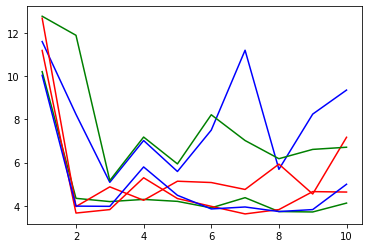

In [6]:
# looking at the response times for the first 6 twins
rt = [float(twins['coop_rt'+str(i)][0]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='b')
rt = [float(twins['coop_rt'+str(i)][1]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='g')
rt = [float(twins['coop_rt'+str(i)][2]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='r')
rt = [float(twins['coop_rt'+str(i)][3]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='g')
rt = [float(twins['coop_rt'+str(i)][4]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='r')
rt = [float(twins['coop_rt'+str(i)][5]) for i in range(1,11)]
plt.plot(range(1,11), rt, color='b')
plt.show()

Notes:
* appears that response time for the first trial is artifically high (probably because of getting used to the game)
* we should remove the first trial and instead consider 2-10
* we observe dips in response time following defection rounds (perhaps indiciating decisive retaliation)

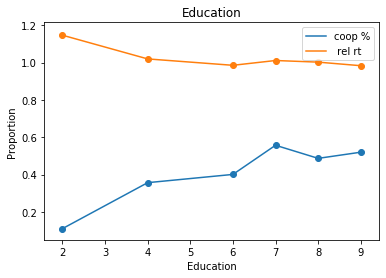

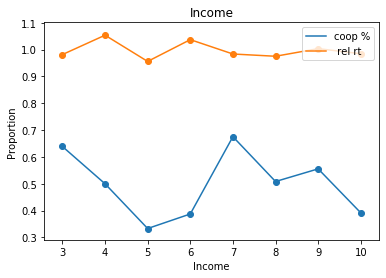

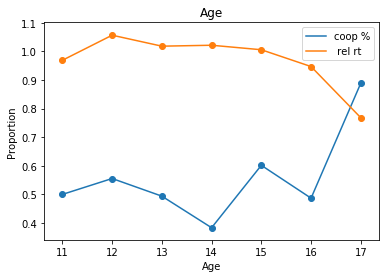

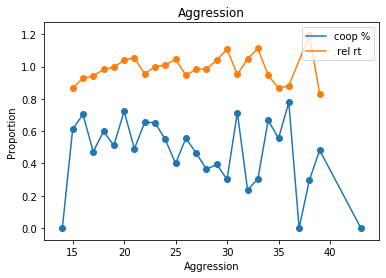

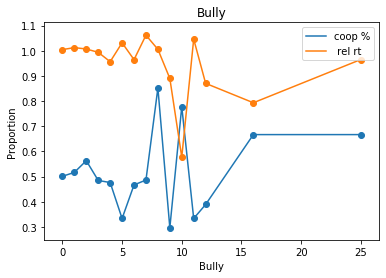

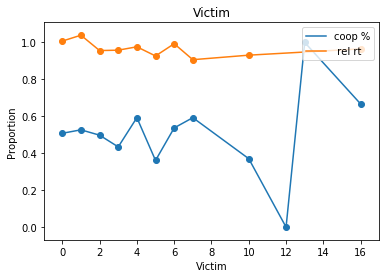

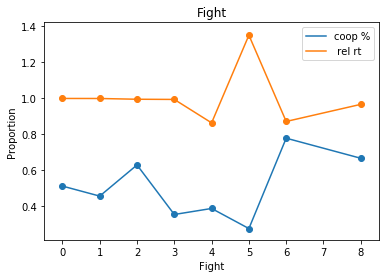

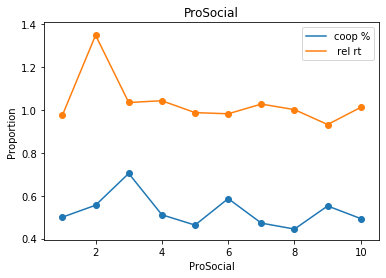

In [7]:
# plot avg rt and avg cooperation percentage for each trial for different levels of a characteristic

# plot avg time to decide to cooperate vs defect for different levels of a characteristic

# plot rel reaction times and rel counts?

#add premptive and reactive defections --> plot avgs for characteristics

''' calculate average reaction time for C/D for a row (i.e. twin) '''
def avgRelRT(row):
    rt_coop = []
    rt_def = []
    for i in range(2,11):
        if row['coop'+str(i)][0] == 'C':
            rt_coop.append(row['coop_rt'+str(i)])
        else:
            rt_def.append(row['coop_rt'+str(i)])
    if len(rt_coop) == 0 or len(rt_def) == 0:
        return 'all C / all D'
    coop_avg = sum(rt_coop)/len(rt_coop)
    def_avg = sum(rt_def)/len(rt_def)
    return coop_avg/def_avg

''' calculate cooperation percentage for a row (i.e. twin) '''
def Coop(row):
    avg = 0
    for i in range(2,11):
        if row['coop'+str(i)][0] == 'C':
            avg += 1
    return avg/9

''' calculate avg coop percentage for each level of a category '''
def avgCoopCat(col):
    cat_avgs = {}
    for index, row in twins.iterrows():
        cat = row[col]
        avg = Coop(row)
        if cat in cat_avgs:
            cat_avgs[cat] += [avg]
        else:
            cat_avgs[cat] = [avg]
    
    for key in cat_avgs:
        cat_avgs[key] = sum(cat_avgs[key])/len(cat_avgs[key])
    
    return cat_avgs

# calculating relative rt

def avgRelRTCat(col):
    avgs = {}
    for index, row in twins.iterrows():
        level = row[col]
        avg = avgRelRT(row)
        if avg == 'all C / all D':
            continue
        if level in avgs:
            avgs[level] += [avg]
        else:
            avgs[level] = [avg]
    
    for key in avgs:
        avgs[key] = sum(avgs[key])/len(avgs[key])
    
    return avgs
    
def plotAvgs(col, xlabel, ylabel, title):
    coop_avgs = avgCoopCat(col)
    rt_avgs = avgRelRTCat(col)
    coop_agg_avgs,rt_agg_avgs = coop_avgs.items(),rt_avgs.items()
    coop_agg_avgs,rt_agg_avgs = sorted(coop_agg_avgs),sorted(rt_agg_avgs)
    coop_x, coop_y = zip(*coop_agg_avgs)
    rt_x, rt_y = zip(*rt_agg_avgs)

    plt.plot(coop_x, coop_y, label = "coop %")
    plt.scatter(coop_x, coop_y)
    plt.plot(rt_x, rt_y, label = " rel rt")
    plt.scatter(rt_x, rt_y)
    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plotAvgs('Education_level', 'Education', 'Proportion', 'Education')
plotAvgs('Income_level', 'Income', 'Proportion', 'Income')
plotAvgs('Age_yrs', 'Age', 'Proportion', 'Age')
plotAvgs('C-EATQ_Aggression', 'Aggression', 'Proportion', 'Aggression')
plotAvgs('C_IBSbully', 'Bully', 'Proportion', 'Bully')
plotAvgs('C_IBSvictim', 'Victim', 'Proportion', 'Victim')
plotAvgs('C_IBSfight', 'Fight', 'Proportion', 'Fight')
plotAvgs('P-SDQ_Procosial', 'ProSocial', 'Proportion', 'ProSocial')

In [8]:
# adding strategy column
def full_coop(row):
    for i in range(1,11):
        if row['coop'+str(i)][0] == 'D':
            return False
    return True
               
def tft(row):
    check = ['C']*3 + ['D'] + ['C']*3 + ['D'] + ['C']*2
    for i in range(1,11):
        if row['coop'+str(i)][0] != check[i-1]:
            return False
    return True

def full_grudge(row):
    check = ['C']*3 + ['D']*7
    for i in range(1,11):
        if row['coop'+str(i)][0] != check[i-1]:
            return False
    return True

def partial_grudge(row):
    check = ['C']*7 + ['D']*3
    for i in range(1,11):
        if i == 4: #allow one retaliatory defection in round 4
            continue
        if row['coop'+str(i)][0] != check[i-1]:
            return False
    return True
               
def draw_blood(row):
    for i in range(1,4):
        if row['coop'+str(i)][0] == 'D':
            return True
    return False

strats = []
for index, row in twins.iterrows():
    if draw_blood(row):
        strats.append('draw blood')
    elif full_grudge(row):
        strats.append('full grudge')
    elif partial_grudge(row):
        strats.append('partial grudge')
    elif tft(row):
        strats.append('tit-for-tat')
    elif full_coop(row):
        strats.append('full cooperation')
    else:
        strats.append('other')
        
twins['Strategy'] = strats

In [20]:
# splitting training and testing twins
twins_1 = pd.DataFrame(columns=twins.columns)
twins_2 = pd.DataFrame(columns=twins.columns)
for index, row in twins.iterrows():
    if row['Random_twin_split'] == 1:
        twins_1 = twins_1.append(row, ignore_index=True)
    else:
        twins_2 = twins_2.append(row, ignore_index=True)
        
twins_1.head()
twins_1.to_csv('dataset_with_strategies.csv',index = False)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

#kNN

le_train = preprocessing.LabelEncoder()
le_test = preprocessing.LabelEncoder()

X_train = twins_1.drop(columns=['Random_twin_split', 'Strategy']+['coop'+str(i) for i in range(1,11)]\
                               +['coop_rt'+str(i) for i in range(1,11)])
X_test = twins_2.drop(columns=['Random_twin_split', 'Strategy']+['coop'+str(i) for i in range(1,11)]\
                               +['coop_rt'+str(i) for i in range(1,11)])

y_train = le_train.fit_transform(twins_1['Strategy'])
y_test = le_test.fit_transform(twins_2['Strategy'])

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, confusion_matrix

# metrics

print("MSE on testing set = ", mean_squared_error(y_test, predicted))
print("mean accuracy =", model.score(X_test,y_test))

MSE on testing set =  3.257425742574257
mean accuracy = 0.45544554455445546


In [12]:
from sklearn.linear_model import LogisticRegression

#logistic regression

clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

/Users/cody/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cody/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
# metrics

print("MSE on testing set = ", mean_squared_error(y_test, predicted))
print("mean accuracy =", clf.score(X_test,y_test))

MSE on testing set =  3.2475247524752477
mean accuracy = 0.33663366336633666


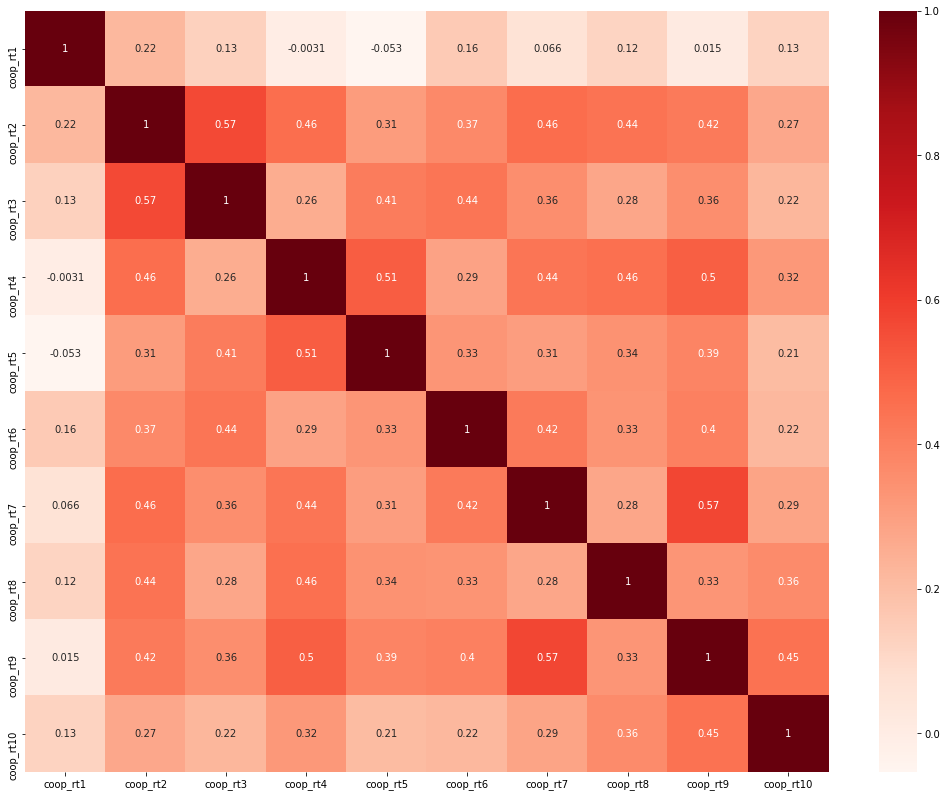

In [14]:
#observe correlation matrix
corrMatrix = twins_1.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Behaviors / Strategies
* tit for tat (defect in 4,8): CCCDCCCDCC
* full grudge (defect 4-10): CCCDDDDDDD
* partial grudge (defect 8-10): CCC
* strategic (defect in 10 but not 9)
* draw blood (defect before 3) (1)
* full cooperation (coop 1-10): CCCCCCCCCC

##### Regression Idea: calculate percentage of usage of each strategy for each level of some characteristics (namely aggression)
##### Classification Idea: predict which strategy will be employed by each twin based on characteristics